<a href="https://colab.research.google.com/github/Rorando111/cpe019/blob/main/Hands_on_Activity_5_2_Build_and_Apply_Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2 - Fundamentals of Computer Vision
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**HOA 5.2: Build and Apply Multilayer Perceptron** |
**Name** | Celeste, Rolando
**Section** | CPE31S9
**Date Performed**: | 20/03/2024
**Date Submitted**: | 20/03/2024
**Instructor**: | Engr. Roman M. Richard

<hr>

## Uploading Dataset and Importing Modules

In [ ]:
# importing modules
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

In [ ]:
data = tf.keras.datasets.fashion_mnist.load_data()

## Splitting data

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

#from sklearn.model_selection import train_test_split

#x_train, x_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# Cast the records into float values
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize image pixel values by dividing
# by 255
gray_scale = 255
x_train /= gray_scale # x_train = x_train/ 255
x_test /= gray_scale


In [ ]:
# Understand the structure of the dataset

print("Feature matrix:", x_train.shape)
print("Target matrix:", x_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)

Feature matrix: (60000, 28, 28)
Target matrix: (10000, 28, 28)
Feature matrix: (60000,)
Target matrix: (10000,)


## Plotting data

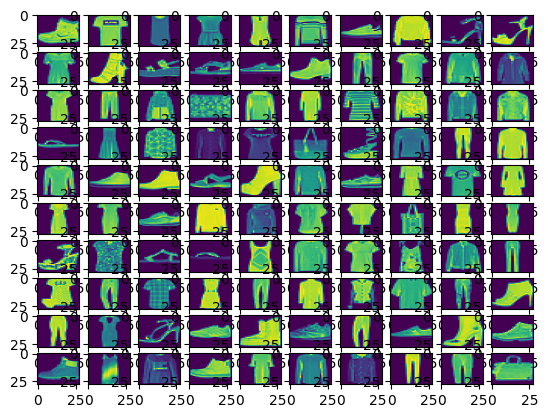

In [ ]:
fig, ax = plt.subplots(10,10)
k = 0
for i in range(10):
  for j in range(10):
    ax[i][j].imshow(x_train[k].reshape(28,28), aspect = 'auto')
    k+=1
plt.show()

## Creating Model

In [ ]:
model = Sequential([# reshape 28 row * 28 column data to 28*28 rows
                    Flatten(input_shape = (28,28)),
                    # dense layer 1
                    Dense(512,activation = 'leaky_relu'),
                    # dense layer 2
                    Dense(256,activation = 'leaky_relu'),
                    # output layer
                    Dense(10,activation = 'softmax'),])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

## Compiling model

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = 10,
          batch_size = 60000,
          validation_split = 0.5)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9070 - loss: 0.2603 - val_accuracy: 0.8994 - val_loss: 0.2855
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9068 - loss: 0.2591 - val_accuracy: 0.9013 - val_loss: 0.2832
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.9076 - loss: 0.2562 - val_accuracy: 0.8983 - val_loss: 0.2864
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9082 - loss: 0.2577 - val_accuracy: 0.8996 - val_loss: 0.2853
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9061 - loss: 0.2569 - val_accuracy: 0.9010 - val_loss: 0.2836
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.9093 - loss: 0.2540 - val_accuracy: 0.8983 - val_loss: 0.2865
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.9083 - loss: 0.2554 - val_accuracy: 0.9000 - val_loss: 0.2855
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9077 - loss: 0.2550 - val_accuracy: 0.9003 - val_loss: 0.2837
Epoch 9/10
1/1 ━

## Evaluation

In [ ]:
results = model.evaluate(x_test, y_test, verbose = 1)
print('test loss, test acc: ', results)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8810 - loss: 0.3420
test loss, test acc:  [0.346221387386322, 0.8787000179290771]


- The model reached the accuracy of 87.87% which means it has high accuracy in identifying the difference from the clothing labels

### Problem to be solved:
- Identify the type of clothing from the 10 fashion class labels:
    * T-shirt/top
    * Trouser/pants
    * Pullover shirt
    * Dress
    * Coat
    * Sandal
    * Shirt
    * Sneaker
    * Bag
    * Ankle boot